<a href="https://colab.research.google.com/github/jtwang1027/business_analysis/blob/master/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple linear regression on a year's worth of sales data to predict Gross Sales

In [0]:
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt


In [0]:
data1=pd.read_csv('/content/drive/My Drive/feb_2020-dataset.csv')



The data has been preprocessed with day of week one hot encoded as well month, date, and year separated into their own columns. The Gross Sales reflect the cumulative sales generated in that hour.

In [10]:
data1.sample(10)

,Hour,Gross Sales,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Month,date,Year
1753,22,35.25,0,0,0,0,0,0,1,5,29,2019
1988,17,41.74,0,0,0,0,0,0,1,6,19,2019
872,18,71.15,0,0,0,1,0,0,0,3,17,2019
344,16,71.78,0,0,0,0,1,0,0,1,31,2019
3553,21,59.95,0,0,0,0,0,0,1,10,30,2019
99,23,3.95,1,0,0,0,0,0,0,1,11,2019
495,21,39.62,0,0,0,0,0,0,1,2,13,2019
2896,17,213.02,1,0,0,0,0,0,0,9,6,2019
2176,20,111.73,0,0,1,0,0,0,0,7,6,2019
4104,12,89.16,0,0,0,0,0,1,0,1,14,2020


It is worth noting the **time-dependent** nature of this data. So a random split of the whole dataset is *cheating*. It'd be better to split the data into *past* and *future*, and train it on the past and evaluate it on the future.

In [0]:
#sort based on date and predict last 25% values

In [18]:
[True]*4


[True, True, True, True]

In [0]:
data1.sort_values(['Year', 'Month','date','Hour'], ascending=[True]*4, inplace=True)

In [23]:
#check that the df is sorted
data1.head(5)

,Hour,Gross Sales,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Month,date,Year
0,11,8.78,0,0,0,0,1,0,0,1,3,2019
1,12,96.74,0,0,0,0,1,0,0,1,3,2019
2,13,48.41,0,0,0,0,1,0,0,1,3,2019
3,14,79.26,0,0,0,0,1,0,0,1,3,2019
4,15,73.65,0,0,0,0,1,0,0,1,3,2019


In [24]:
data1.tail(5) #we can confirm the data is sorted from 2019 -2020 with the final dates collected in Feb

,Hour,Gross Sales,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Month,date,Year
4482,18,106.43,1,0,0,0,0,0,0,2,14,2020
4483,19,88.62,1,0,0,0,0,0,0,2,14,2020
4484,20,90.66,1,0,0,0,0,0,0,2,14,2020
4485,21,104.01,1,0,0,0,0,0,0,2,14,2020
4486,22,46.22,1,0,0,0,0,0,0,2,14,2020


In [0]:
y=data1['Gross Sales'] 
X= data1.drop(['Gross Sales'],axis=1)
X=X.reindex(sorted(X.columns),axis=1) #put in alphabetical order

In [33]:
X.shape

(4487, 11)

In [30]:
4487*.8

3589.6000000000004

In [0]:
xtrain= X.iloc[:3589,:]#split 80-20
ytrain= y.iloc[:3589]#split 80-20

xtrain= X.iloc[3589:,:]#split 80-20
ytrain= y.iloc[3589:]#split 80-20

In [0]:
reg=linear_model.LinearRegression() #instantiate model
reg.fit(xtrain, ytrain) #fit model on training data

y_pred=reg.predict(xtest) #generate prediction



In [36]:
mse=sqrt(mean_squared_error(ytest, y_pred))
f'RMSE: ${round(mse,2)}'

'RMSE: $47.88'

In [42]:
#mean average error
mae=abs(ytest-y_pred).sum()/ len(y_pred)
f'mean average error: ${round(mae,2)}'

'mean average error: $36.2'

How significant is a MAE $36.20?




In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Freq')

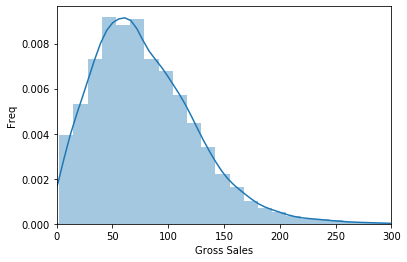

In [50]:
sns.distplot(data1['Gross Sales'])
plt.xlim(0,300)
plt.xlabel('Gross Sales')
plt.ylabel('Freq')

We can see that being off by $36.20 can be a significant amount in the course of an hour. Perhaps we can do better using other models. Or, adding factors (such as events, weather) to improve this model.